# Майнор по Анализу Данных, Группа ИАД-4
## 19/10/2017 Практика с нейронными сетями

In [1]:
from keras.models import Sequential
from keras.layers import Dense

import numpy
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

RND_SEED = 7
plt.style.use('ggplot')

numpy.random.seed(RND_SEED)

%matplotlib inline

Using TensorFlow backend.


# Классификация

## Загрузка данных

Для тренеровки мы будем использовать достаточно известный набор данных [Pima Indians](http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes).

Признаки такие: <br\>
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)


In [56]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data',
                 sep=',', header=None)

In [57]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [58]:
X, y = df.iloc[:, :8].values, df.iloc[:, 8].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [69]:
model = Sequential()
model.add(Dense(12, input_dim=8, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [70]:
from keras.optimizers import SGD

In [71]:
# Compile model
model.compile(loss='binary_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

## Обучаем

In [72]:
# Fit the model
model.fit(X_train, y_train, 
          nb_epoch=500, 
          batch_size=50, 
          verbose=0)

## Оценка качества

In [73]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

 32/154 [=====>........................] - ETA: 0sacc: 74.03%


In [74]:
y_hat = model.predict(X_test).flatten()

In [75]:
y_hat[:10]

array([ 0.03262314,  0.44662398,  0.11943323,  0.1487564 ,  0.15892425,
        0.43256167,  0.00871862,  0.4862012 ,  0.26264668,  0.23964411], dtype=float32)

Постройте ROC-кривые для обучающей и контрольной выборки. Есть ли переобучение?

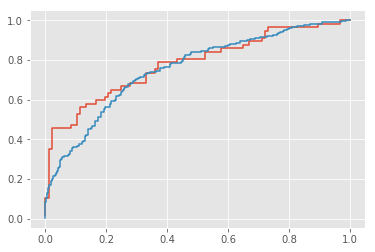

In [76]:
fpr, tpr, _ = roc_curve(y_test, y_hat, )
plt.plot(fpr, tpr, label='test')

y_hat_train = model.predict(X_train).flatten()
fpr, tpr, _ = roc_curve(y_train, y_hat_train, )
plt.plot(fpr, tpr, label='train')

# Регрессия

Будем строить регрессию на данных [Boston Housing Data Set](https://archive.ics.uci.edu/ml/datasets/Housing)

Описание:<br\>
1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per 10,000 USD
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: lower status of the population
14. MEDV: Median value of owner-occupied homes in 1000's USD

Весь pipeline практически повторяется. Ну и повторим.

In [77]:
from sklearn import datasets

In [78]:
boston = datasets.load_boston()

In [81]:
y = boston.target

In [82]:
X = boston.data

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=RND_SEED)

In [85]:
sc = StandardScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

## Составляем модель

Построим простую 2х (3х) слойную нейронную сеть. Делать это в keras одно удовольствие

In [90]:
model = Sequential()
model.add(Dense(12, input_dim=13, init='normal', activation='relu'))
model.add(Dense(8, init='normal', activation='relu'))
model.add(Dense(1, init='normal', activation='linear'))

Теперь надо задать функцию [ошибки](https://keras.io/objectives/), способ [оптимизации](https://keras.io/optimizers/) и метрику измерения [качества](https://keras.io/metrics/):

In [91]:
from keras.optimizers import SGD

In [92]:
# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['mean_squared_error'])

## Обучаем

In [93]:
# Fit the model
model.fit(X_train, y_train, 
          nb_epoch=500, 
          batch_size=50, 
          verbose=1)

Epoch 1/500
404/404 [==============================] - 0s - loss: 525.9456 - mean_squared_error: 525.9456     
Epoch 2/500
404/404 [==============================] - 0s - loss: 239.7357 - mean_squared_error: 239.7357     
Epoch 3/500
404/404 [==============================] - 0s - loss: 1470724695988345452598295709876224.0000 - mean_squared_error: 1470724695988345452598295709876224.0000     
Epoch 4/500
404/404 [==============================] - 0s - loss: 1369862221923653713098621059072.0000 - mean_squared_error: 1369862221923653713098621059072.0000     
Epoch 5/500
404/404 [==============================] - 0s - loss: 952239773805227311115593056256.0000 - mean_squared_error: 952239773805227311115593056256.0000     
Epoch 6/500
404/404 [==============================] - 0s - loss: 661935423563330165517534101504.0000 - mean_squared_error: 661935423563330165517534101504.0000     
Epoch 7/500
404/404 [==============================] - 0s - loss: 460134699549127301043975094272.0000 - mean

404/404 [==============================] - 0s - loss: 74450537355081448161280.0000 - mean_squared_error: 74450537355081448161280.0000      ETA: 0s - loss: 80589379805204816330752.0000 - mean_squared_error: 80589379805204816330752.00
Epoch 51/500
404/404 [==============================] - 0s - loss: 51753209203029184610304.0000 - mean_squared_error: 51753209203029184610304.0000     
Epoch 52/500
404/404 [==============================] - 0s - loss: 35975480876087245799424.0000 - mean_squared_error: 35975480876087245799424.0000     
Epoch 53/500
404/404 [==============================] - 0s - loss: 25007828240001432289280.0000 - mean_squared_error: 25007828240001432289280.0000     
Epoch 54/500
404/404 [==============================] - ETA: 0s - loss: 17750379163241328672768.0000 - mean_squared_error: 17750379163241328672768.00 - 0s - loss: 17383826143722606690304.0000 - mean_squared_error: 17383826143722606690304.0000     
Epoch 55/500
404/404 [==============================] - 0s - lo

404/404 [==============================] - 0s - loss: 220604177546290.7188 - mean_squared_error: 220604177546290.7188     
Epoch 105/500
404/404 [==============================] - 0s - loss: 153349744619722.7500 - mean_squared_error: 153349744619722.7500     
Epoch 106/500
404/404 [==============================] - 0s - loss: 106598810613536.9375 - mean_squared_error: 106598810613536.9375     
Epoch 107/500
404/404 [==============================] - 0s - loss: 74100584031749.0625 - mean_squared_error: 74100584031749.0625     
Epoch 108/500
404/404 [==============================] - 0s - loss: 51509935737379.4766 - mean_squared_error: 51509935737379.4766     
Epoch 109/500
404/404 [==============================] - 0s - loss: 35806378661583.8438 - mean_squared_error: 35806378661583.8438     
Epoch 110/500
404/404 [==============================] - 0s - loss: 24890278627713.2695 - mean_squared_error: 24890278627713.2695     
Epoch 111/500
404/404 [==============================] - 0s - l

404/404 [==============================] - 0s - loss: 17291.0356 - mean_squared_error: 17291.0356     
Epoch 169/500
404/404 [==============================] - 0s - loss: 12024.7992 - mean_squared_error: 12024.7992     
Epoch 170/500
404/404 [==============================] - 0s - loss: 8373.9564 - mean_squared_error: 8373.9564     
Epoch 171/500
404/404 [==============================] - 0s - loss: 5864.5042 - mean_squared_error: 5864.5042     
Epoch 172/500
404/404 [==============================] - 0s - loss: 4122.5598 - mean_squared_error: 4122.5598     
Epoch 173/500
404/404 [==============================] - 0s - loss: 2884.8720 - mean_squared_error: 2884.8720     
Epoch 174/500
404/404 [==============================] - 0s - loss: 2033.9892 - mean_squared_error: 2033.9892     
Epoch 175/500
404/404 [==============================] - 0s - loss: 1438.9609 - mean_squared_error: 1438.9609     
Epoch 176/500
404/404 [==============================] - 0s - loss: 1026.5457 - mean_squar

404/404 [==============================] - 0s - loss: 85.3915 - mean_squared_error: 85.3915     
Epoch 241/500
404/404 [==============================] - 0s - loss: 85.3760 - mean_squared_error: 85.3760     
Epoch 242/500
404/404 [==============================] - 0s - loss: 85.3884 - mean_squared_error: 85.3884     
Epoch 243/500
404/404 [==============================] - 0s - loss: 85.4002 - mean_squared_error: 85.4002     
Epoch 244/500
404/404 [==============================] - 0s - loss: 85.4229 - mean_squared_error: 85.4229     
Epoch 245/500
404/404 [==============================] - 0s - loss: 85.4236 - mean_squared_error: 85.4236     
Epoch 246/500
404/404 [==============================] - 0s - loss: 85.3757 - mean_squared_error: 85.3757     
Epoch 247/500
404/404 [==============================] - 0s - loss: 85.3756 - mean_squared_error: 85.3756     
Epoch 248/500
404/404 [==============================] - 0s - loss: 85.3582 - mean_squared_error: 85.3582     
Epoch 249/500
4

404/404 [==============================] - 0s - loss: 85.3726 - mean_squared_error: 85.3726     
Epoch 313/500
404/404 [==============================] - 0s - loss: 85.3796 - mean_squared_error: 85.3796     
Epoch 314/500
404/404 [==============================] - 0s - loss: 85.3683 - mean_squared_error: 85.3683     
Epoch 315/500
404/404 [==============================] - 0s - loss: 85.3665 - mean_squared_error: 85.3665     
Epoch 316/500
404/404 [==============================] - ETA: 0s - loss: 79.2482 - mean_squared_error: 79.24 - 0s - loss: 85.3704 - mean_squared_error: 85.3704     
Epoch 317/500
404/404 [==============================] - 0s - loss: 85.3730 - mean_squared_error: 85.3730     
Epoch 318/500
404/404 [==============================] - 0s - loss: 85.3704 - mean_squared_error: 85.3704     
Epoch 319/500
404/404 [==============================] - 0s - loss: 85.3830 - mean_squared_error: 85.3830     
Epoch 320/500
404/404 [==============================] - 0s - loss: 85.3

404/404 [==============================] - 0s - loss: 85.3750 - mean_squared_error: 85.3750     
Epoch 384/500
404/404 [==============================] - 0s - loss: 85.3407 - mean_squared_error: 85.3407     
Epoch 385/500
404/404 [==============================] - 0s - loss: 85.4155 - mean_squared_error: 85.4155     
Epoch 386/500
404/404 [==============================] - 0s - loss: 85.3830 - mean_squared_error: 85.3830     
Epoch 387/500
404/404 [==============================] - 0s - loss: 85.3828 - mean_squared_error: 85.3828      ETA: 0s - loss: 83.6494 - mean_squared_error: 83.64
Epoch 388/500
404/404 [==============================] - 0s - loss: 85.4277 - mean_squared_error: 85.4277     
Epoch 389/500
404/404 [==============================] - 0s - loss: 85.4285 - mean_squared_error: 85.4285     
Epoch 390/500
404/404 [==============================] - 0s - loss: 85.4059 - mean_squared_error: 85.4059     
Epoch 391/500
404/404 [==============================] - 0s - loss: 85.407

404/404 [==============================] - 0s - loss: 85.3570 - mean_squared_error: 85.3570     
Epoch 455/500
404/404 [==============================] - 0s - loss: 85.3544 - mean_squared_error: 85.3544     
Epoch 456/500
404/404 [==============================] - 0s - loss: 85.3733 - mean_squared_error: 85.3733     
Epoch 457/500
404/404 [==============================] - 0s - loss: 85.3401 - mean_squared_error: 85.3401     
Epoch 458/500
404/404 [==============================] - 0s - loss: 85.3649 - mean_squared_error: 85.3649     
Epoch 459/500
404/404 [==============================] - 0s - loss: 85.3522 - mean_squared_error: 85.3522     
Epoch 460/500
404/404 [==============================] - 0s - loss: 85.3600 - mean_squared_error: 85.3600     
Epoch 461/500
404/404 [==============================] - 0s - loss: 85.3500 - mean_squared_error: 85.3500     
Epoch 462/500
404/404 [==============================] - 0s - loss: 85.3571 - mean_squared_error: 85.3571     
Epoch 463/500
4

## Оценка качества

In [97]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f" % (model.metrics_names[1], scores[1]))

 32/102 [========>.....................] - ETA: 0smean_squared_error: 80.81


# Конволюционные нейронные сети

<img src='http://i.stack.imgur.com/oUwMk.png'>

In [ ]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.layers import Activation
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

from keras import backend as K

In [ ]:
from keras.optimizers import SGD

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

n_train, img_rows, img_cols = X_train.shape
n_test, _, _ = X_test.shape

n_train, n_test, img_rows, img_cols

Посмотрим на данные

## Готовим данные
Есть некоторые заморочки связанные с тем, в каком виде должны быть данные

In [ ]:
X_train.shape

In [ ]:
img_rows, img_cols = 28, 28

if K.image_dim_ordering() != 'tf':
    shape_ord = (1, img_rows, img_cols)
else:  # channel_last
    shape_ord = (img_rows, img_cols, 1)

In [ ]:
X_train = X_train.reshape((X_train.shape[0],) + shape_ord)
X_test = X_test.reshape((X_test.shape[0],) + shape_ord)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255


# numbers 0-9, so ten classes
n_classes = 10

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
X_train.shape

## Составляем модель

In [ ]:
# Количество конволюционных фильтров
n_filters = 32

# Размер фильра
n_conv = 3

# Размер пуллинга
n_pool = 2

model = Sequential()
model.add(Convolution2D( 
        n_filters, n_conv, n_conv,
        border_mode='valid',
        input_shape=input_shape,
        activation='relu'
))

# Конволюция
model.add(Convolution2D(n_filters, n_conv, n_conv, activation='relu'))

# Пуллинг
model.add(MaxPooling2D(pool_size=(n_pool, n_pool)))
model.add(Dropout(0.25))

# Выравниваем
model.add(Flatten())

# Делаем полносвязный слой
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Softmax в конце
model.add(Dense(n_classes, activation='softmax'))

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train,
          y_train,
          batch_size=32,
          nb_epoch=10,
          validation_data=(X_test, y_test),
          verbose=1)

## Внитри модели

In [ ]:
for i, layer in enumerate(model.layers):
    print ("Layer", i, "\t", layer.name, "\t\t", layer.input_shape, "\t", layer.output_shape)

In [ ]:
for i, layer in enumerate(model.layers):
    if len(layer.get_weights()) > 0:
        W, b = layer.get_weights()
        print("Layer", i, "\t", layer.name, "\t\t", W.shape, "\t", b.shape)

# Цветные картинки

In [ ]:
from keras.datasets import cifar10
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

nb_classes = 10
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

По сути это уменьшенные изображения, которые нам повсюду встречаются. Сеть должна уметь выполнять классификацию не зависимо от того, повернут ли объект, уменьшен он или увеличен и тп.

То есть в обучающей выборке должны содержаться такие элементарные трансформации

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

generated_images = ImageDataGenerator(
    featurewise_center=True,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=True,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

generated_images.fit(X_train)

Далее, продолжаем по https://github.com/fchollet/keras/blob/master/examples/cifar10_cnn.py